In [15]:
import networkx as nx
from matplotlib import pyplot, patches
from scipy import io
import numpy as np
from collections import defaultdict
import louvain
import pickle
from tqdm import tqdm
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt 

C:\Users\wyw25\AppData\Local\Temp/ipykernel_64348/254710273.py:6: DeprecationWarning: This package has been superseded by the `leidenalg` package and will no longer be maintained. Please upgrade to the `leidenalg` package.
  import louvain


In [2]:
def Prob_links(Mat,alpha):
    N=len(Mat)
    incr_m=Mat
    decay_m=[[0] * N for row in range(N)]
    # degree for each mode 
    Degree=np.sum(Mat, axis=0)
   

    for i in range(N):
        Value={}
        Decline={}
        for j in range(i+1,N):  # the node i with j
            if Mat[i][j]==0:  # no link
                Value[j]=Degree[j] # degree is the value     
                    
            if Mat[i][j]==1:  # with link
                Decline[j]=Degree[j] # degree is the value
                
    #    print(Value)
        max_keys=0
        max_value=0
        if len(Value) >0:
            max_value = max(Value.values())  # maximum value
            max_keys = [k for k, v in Value.items() if v == max_value]    # maximun keys    
    #    print(max_keys)
        # count the number of maxium keys for divider
        if max_keys != 0:
            for k in max_keys:
                incr_m[i][k]=  alpha/len(max_keys)
                incr_m[k][i]=  alpha/len(max_keys)
          
                
        min_keys=0
        min_value=0
        if len(Decline) >0:
            min_value = min(Decline.values())  # min value
            min_keys = [k for k, v in Decline.items() if v == min_value]    # min keys    
            
        if min_keys != 0:
            for k in min_keys:
                decay_m[i][k]=  (1-alpha)/len(min_keys)
                decay_m[k][i]= (1- alpha)/len(min_keys)         
                            
        
    return  incr_m, decay_m

        

In [3]:
def CreatMat(incr_m,decay_m):
    B=np.random.rand(*np.array(incr_m).shape)
    B_symm = (B + B.T)/2
    adjacency_add = B_symm  <= np.array(incr_m) # adjacency[ii, jj] is True with probability P[ii, jj]
    adjacency_de = B_symm  <= np.array(decay_m) # adjacency[ii, jj] is True with probability P[ii, jj]
    
    New_Mat=adjacency_add*1-adjacency_de*1
       
    
 #   print(New_Mat)
    return New_Mat.tolist()
    

In [4]:
def Make_stable(Mat,n,alpha):
    for i in tqdm(range(n)):
        incr_m,decay_m=Prob_links(Mat,alpha)
        Mat=CreatMat(incr_m,decay_m)
            
    return Mat
    

In [5]:
def Make_Ori_Mat(N):
    MATRIX=np.random.rand(N,N)
    np.fill_diagonal(MATRIX, 0)
    bollmat = 0.5  <= MATRIX
    nummat=1*bollmat
    randmat=np.minimum( nummat, nummat.transpose() )
    
    return randmat.tolist()
    

In [13]:
def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):
    """
    - G is a netorkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    fig = pyplot.figure(figsize=(5, 5)) # in inches
    pyplot.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")
    
    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    assert len(partitions) == len(colors)
    ax = pyplot.gca()
    for partition, color in zip(partitions, colors):
        current_idx = 0
        for module in partition:
            ax.add_patch(patches.Rectangle((current_idx, current_idx),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth="1"))
            current_idx += len(module)

In [21]:
Mat=Make_Ori_Mat(100)

In [22]:
G=nx.from_numpy_matrix(np.array(Mat))

C:\Users\wyw25\AppData\Local\Temp/ipykernel_64348/3589230769.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)


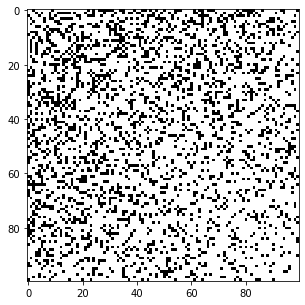

In [23]:
degreeofday=dict(G.degree)
degreeofday_new={k: v for k, v in sorted(degreeofday.items(), key=lambda item: item[1], reverse=True)}
nodenewlist=list(degreeofday_new.keys())
draw_adjacency_matrix(G,nodenewlist)

In [39]:
mmmm=Make_stable(Mat,10000,0.49)

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [01:14<00:00, 134.02it/s]


In [40]:
G=nx.from_numpy_matrix(np.array(mmmm))

C:\Users\wyw25\AppData\Local\Temp/ipykernel_64348/3589230769.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)


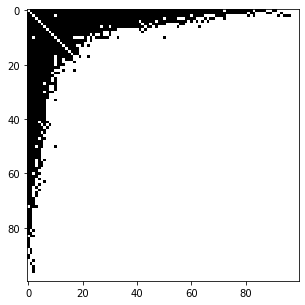

In [41]:
degreeofday=dict(G.degree)
degreeofday_new={k: v for k, v in sorted(degreeofday.items(), key=lambda item: item[1], reverse=True)}
nodenewlist=list(degreeofday_new.keys())
draw_adjacency_matrix(G,nodenewlist)

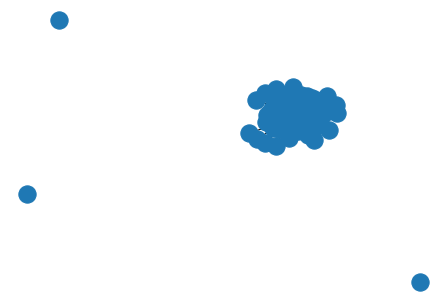

In [42]:
nx.draw(G)